# COVID-19 Auswertung - Impfungen


## import libraries

In [144]:
Programm_Name = "Impfungen" # 04.01.2021 - Time Series Impffdaten erstellen

### Speicherorte und Dateinamen Plots

In [145]:
Laufwerk = "D:\\"
pfad_output = "Github\\Auswertung_Covid_19\\output\\"
pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"

name_input = "Impfquotenmonitoring.xlsx"
name_input2 = "02-bundeslaender.xlsx"

name_7 = "plot_7_Impfquote_ger.png" # Impfquote Deutschland Bundesländer
name_7_2 = "plot_7-2_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland
name_7_3 = "plot_7-3_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland
name_7_4 = "plot_7-4_Impfungen_kumuliert_Timeseries_ger.png" # Impfungen Timeseries Deutschland

name_output_df_EW = 'Dataframes\\df_EW.csv'
name_output_df_I = 'Dataframes\\df_I.csv'
name_output_df_I_EW = 'Dataframes\\df_I_EW.csv'
name_output_df_I_TS = 'Dataframes\\df_I_TS.csv'

name_performance = 'Dataframes\\df_performance.csv'

### Speicherorte und Dateinamen Plots

In [146]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
import matplotlib.dates as mdates
#import matplotlib as mpl
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
import numpy as np

# performance
from datetime import datetime, timedelta
from datetime import date # todays date
#import seaborn as sns

import os
now = datetime.now()

In [147]:
# Datum einstellen 
minticks = 14
maxticks = 14

# Variablen für die Plots definieren

### Linien und Schriftgrößen

In [148]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25

# output größe der bilder
h = 16*1.3
v = 9
dpi = 200

 ### Bezugsgröße Einwohner

In [149]:
pE = 100_000

## Länder Farben

In [150]:
c_fr = '#f80d0d'    # rot
c_pl = '#25e5e5'    # cyan
c_isr = '#25e5e5'
c_ger = '#0721ff'   # dunkelblau
c_cz = '#bb8fce'    # lila
c_usa = '#bb8fce'
c_at = '#18c213'    # grün
c_rus = '#18c213'
c_se = '#18c213'
c_ch = '#000000'    # schwarz
c_ita = '#000000'
c_gb = '#faac2b'    # orange


### Einwohnerzahlen

In [151]:
E_fr = 66_012_908
E_pl = 38_659_927
E_ger = 83_020_000
E_cz = 10_586_651
E_at = 8_902_600
E_ch = 8_847_020
E_gb = 66_650_000

E_isr = 8_884_000
E_usa = 328_200_000
E_rus = 144_500_000
E_ita = 60_360_000
E_spa = 46_940_000
E_se = 10_230_000


# Preprocessing Dataframes

In [152]:
today = date.today().strftime("%d.%m.%Y")

## Datenimport

In [153]:
# Datenimport Einwohnerdaten Bundesländer
df_EW = pd.read_excel(Laufwerk + pfad_input + name_input2,
                     sheet_name="Bundesländer_mit_Hauptstädten",
                     usecols="A:G",
                     skiprows=6)


# Impfungen sheet_name der Datenquelle auslesen
df_I_sheet = pd.read_excel(Laufwerk + pfad_input + name_input, None)
sheet_name = df_I_sheet.keys()         # Tabellenblätter Namen auslesen
sheet_name = [*sheet_name][2]          # Namen des zweiten Tabellenblattes anzeigen [*dict] dict keyword->list Index 1 anzeigen


# Datenimport Impfungen
df_I = pd.read_excel(Laufwerk + pfad_input + name_input,
                    sheet_name = sheet_name,
                    usecols="A:W")


In [154]:
df_I.head(3)

,RS,Bundesland,"Impfungen in Impfzentren, Mobilen Teams, Krankenhäusern",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Impfungen bei niedergelassenen Ärzten,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,begonnene Impfserie**,NaN,NaN,NaN,NaN,vollständig geimpft**,NaN,NaN,...,begonnene Impfserie**,NaN,NaN,NaN,NaN,vollständig geimpft**,NaN,NaN,NaN,NaN
1,NaN,NaN,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag,Impfungen kumulativ,NaN,NaN,...,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag,Impfungen kumulativ,NaN,NaN,NaN,NaN
2,NaN,NaN,Gesamt,BioNTech,Moderna,AstraZeneca,NaN,Gesamt,BioNTech,Moderna,...,Gesamt,BioNTech,Moderna,AstraZeneca,NaN,Gesamt,BioNTech,Moderna,AstraZeneca,Janssen


## preprocessing

In [155]:
print(datetime. today())
ts_x = str(datetime. today() - timedelta(140))
ts = pd.to_datetime(ts_x, utc=True)
print(ts)

2021-05-24 21:54:09.981733
2021-01-04 21:54:09.981733+00:00


### df_I (Impfdaten pro Bundesland)

In [156]:
df_I.head(7)

,RS,Bundesland,"Impfungen in Impfzentren, Mobilen Teams, Krankenhäusern",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Impfungen bei niedergelassenen Ärzten,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,begonnene Impfserie**,NaN,NaN,NaN,NaN,vollständig geimpft**,NaN,NaN,...,begonnene Impfserie**,NaN,NaN,NaN,NaN,vollständig geimpft**,NaN,NaN,NaN,NaN
1,NaN,NaN,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag,Impfungen kumulativ,NaN,NaN,...,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag,Impfungen kumulativ,NaN,NaN,NaN,NaN
2,NaN,NaN,Gesamt,BioNTech,Moderna,AstraZeneca,NaN,Gesamt,BioNTech,Moderna,...,Gesamt,BioNTech,Moderna,AstraZeneca,NaN,Gesamt,BioNTech,Moderna,AstraZeneca,Janssen
3,8.0,Baden-Württemberg,3035259,1921189,329144,784926,30483,1280115,1072065,102190,...,1296762,1038741,401,257620,31977,239375,231213,85,7947,130
4,9.0,Bayern,3574009,2474712,371718,727579,14856,1460121,1270876,117689,...,1752490,1278994,644,472852,35046,259335,235569,946,22129,691
5,11.0,Berlin,896992,598853,112137,186002,8521,475663,414425,54698,...,462431,334363,273,127795,11709,70516,61714,107,8695,0
6,12.0,Brandenburg,519700,347013,65470,107217,4808,295776,236292,39494,...,359560,247266,601,111693,8244,69862,64219,85,5547,11


In [157]:
# df_I = df_I.drop(columns=['Insgesamt über alle Impfstellen',
#                          '','','','','','','','','','','','','','','',''])


In [158]:
df_I = df_I.iloc[3:19]   # drop rows

In [159]:
# list(df_I)

In [160]:
df_I

,RS,Bundesland,"Impfungen in Impfzentren, Mobilen Teams, Krankenhäusern",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Impfungen bei niedergelassenen Ärzten,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
3,8.0,Baden-Württemberg,3035259,1921189,329144,784926,30483,1280115,1072065,102190,...,1296762,1038741,401,257620,31977,239375,231213,85,7947,130
4,9.0,Bayern,3574009,2474712,371718,727579,14856,1460121,1270876,117689,...,1752490,1278994,644,472852,35046,259335,235569,946,22129,691
5,11.0,Berlin,896992,598853,112137,186002,8521,475663,414425,54698,...,462431,334363,273,127795,11709,70516,61714,107,8695,0
6,12.0,Brandenburg,519700,347013,65470,107217,4808,295776,236292,39494,...,359560,247266,601,111693,8244,69862,64219,85,5547,11
7,4.0,Bremen,200744,122900,13837,64007,2272,108904,94740,7684,...,75858,58906,14,16938,2039,10828,10451,26,351,0
8,2.0,Hamburg,507127,324518,62090,120519,293,216392,193636,18146,...,195588,151891,3355,40342,5905,26266,24750,55,1461,0
9,6.0,Hessen,1773336,1105678,200432,467226,13871,648017,561247,43239,...,739669,565232,191,174246,18564,108948,101878,151,6871,48
10,13.0,Mecklenburg-Vorpommern,404701,287345,51230,66126,2922,169370,148520,16201,...,263305,196163,141,67001,3645,42748,38656,95,3981,16
11,3.0,Niedersachsen,2205864,1332467,207904,665493,11539,835960,709980,77300,...,1050507,775202,618,274687,24833,136619,124179,551,11831,58
12,5.0,Nordrhein-Westfalen,4950857,3328053,474783,1148021,28203,1946571,1767242,130214,...,2612127,1836815,6664,768648,64729,330918,300570,2051,27751,546


In [161]:
df_I = df_I.drop(columns=['Impfungen in Impfzentren, Mobilen Teams, Krankenhäusern ',
                          'Unnamed: 6',
                          'Unnamed: 7',
                          'Unnamed: 12',
                          'Impfungen bei niedergelassenen Ärzten',
                          'Unnamed: 17',
                          'Unnamed: 18',
                          'RS'])

In [162]:
df_I.head(1)

,Bundesland,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
3,Baden-Württemberg,1921189,329144,784926,1072065,102190,82358,23502,1038741,401,257620,231213,85,7947,130


### Erstimpfungen ermitteln

In [163]:
# rename columns
# Erstimpfung Impfzentren
df_I.rename(columns= {"Unnamed: 3": "BioNTech_EI_1"},inplace=True)
df_I.rename(columns= {"Unnamed: 4": "Moderna_EI_1"},inplace=True)
df_I.rename(columns= {"Unnamed: 5": "AstraZeneca_EI_1"},inplace=True)

df_I.rename(columns= {"Unnamed: 14": "BioNTech_EI_2"},inplace=True)
df_I.rename(columns= {"Unnamed: 15": "Moderna_EI_2"},inplace=True)
df_I.rename(columns= {"Unnamed: 16": "AstraZeneca_EI_2"},inplace=True)
# df_I.head(1)

# Erstimpfung Hausärzte
# berechnen um die Summe der EI ZI zu bekommen
df_I["BioNTech_EI"] = df_I["BioNTech_EI_1"] + df_I["BioNTech_EI_2"]
df_I["Moderna_EI"] = df_I["Moderna_EI_1"] + df_I["Moderna_EI_2"]
df_I["AstraZeneca_EI"] = df_I["AstraZeneca_EI_1"] + df_I["AstraZeneca_EI_2"]
df_I["Summe_EI"] = df_I["BioNTech_EI"] + df_I["Moderna_EI"] + df_I["AstraZeneca_EI"]


# drop columns 
df_I = df_I.drop(columns=['BioNTech_EI_1',
                          'Moderna_EI_1',
                          'AstraZeneca_EI_1',
                          'BioNTech_EI_2',
                          'Moderna_EI_2',
                          'AstraZeneca_EI_2'])
df_I

,Bundesland,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_EI
3,Baden-Württemberg,1072065,102190,82358,23502,231213,85,7947,130,2959930,329545,1042546,4332021
4,Bayern,1270876,117689,61593,9963,235569,946,22129,691,3753706,372362,1200431,5326499
5,Berlin,414425,54698,2787,3753,61714,107,8695,0,933216,112410,313797,1359423
6,Brandenburg,236292,39494,18040,1950,64219,85,5547,11,594279,66071,218910,879260
7,Bremen,94740,7684,3285,3195,10451,26,351,0,181806,13851,80945,276602
8,Hamburg,193636,18146,3299,1311,24750,55,1461,0,476409,65445,160861,702715
9,Hessen,561247,43239,42394,1137,101878,151,6871,48,1670910,200623,641472,2513005
10,Mecklenburg-Vorpommern,148520,16201,2122,2527,38656,95,3981,16,483508,51371,133127,668006
11,Niedersachsen,709980,77300,22775,25905,124179,551,11831,58,2107669,208522,940180,3256371
12,Nordrhein-Westfalen,1767242,130214,41507,7608,300570,2051,27751,546,5164868,481447,1916669,7562984


### Zweitimpfungen ermitteln

In [164]:
# rename columns
df_I.rename(columns= {"Unnamed: 8": "BioNTech_ZI_1"},inplace=True)
df_I.rename(columns= {"Unnamed: 9": "Moderna_ZI_1"},inplace=True)
df_I.rename(columns= {"Unnamed: 10": "AstraZeneca_ZI_1"},inplace=True)
df_I.rename(columns= {"Unnamed: 11": "Janssen_ZI_1"},inplace=True)

df_I.rename(columns= {"Unnamed: 19": "BioNTech_ZI_2"},inplace=True)
df_I.rename(columns= {"Unnamed: 20": "Moderna_ZI_2"},inplace=True)
df_I.rename(columns= {"Unnamed: 21": "AstraZeneca_ZI_2"},inplace=True)
df_I.rename(columns= {"Unnamed: 22": "Janssen_ZI_2"},inplace=True)

df_I.head(1)

# berechnen um die Summe der EI ZI zu bekommen
df_I["BioNTech_ZI"] = df_I["BioNTech_ZI_1"] + df_I["BioNTech_ZI_2"]
df_I["Moderna_ZI"] = df_I["Moderna_ZI_1"] + df_I["Moderna_ZI_2"]
df_I["AstraZeneca_ZI"] = df_I["AstraZeneca_ZI_1"] + df_I["AstraZeneca_ZI_2"]
df_I["Janssen_ZI"] = df_I["Janssen_ZI_1"] + df_I["Janssen_ZI_2"]

df_I["Summe_ZI"] = df_I["BioNTech_ZI"] + df_I["Moderna_ZI"] + df_I["AstraZeneca_ZI"] + df_I["Janssen_ZI"]

# drop columns 
df_I = df_I.drop(columns=['BioNTech_ZI_1',
                          'Moderna_ZI_1',
                          'AstraZeneca_ZI_1',
                          'Janssen_ZI_1',
                          'BioNTech_ZI_2',
                          'Moderna_ZI_2',
                          'AstraZeneca_ZI_2',
                          'Janssen_ZI_2'])
df_I

,Bundesland,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_EI,BioNTech_ZI,Moderna_ZI,AstraZeneca_ZI,Janssen_ZI,Summe_ZI
3,Baden-Württemberg,2959930,329545,1042546,4332021,1303278,102275,90305,23632,1519490
4,Bayern,3753706,372362,1200431,5326499,1506445,118635,83722,10654,1719456
5,Berlin,933216,112410,313797,1359423,476139,54805,11482,3753,546179
6,Brandenburg,594279,66071,218910,879260,300511,39579,23587,1961,365638
7,Bremen,181806,13851,80945,276602,105191,7710,3636,3195,119732
8,Hamburg,476409,65445,160861,702715,218386,18201,4760,1311,242658
9,Hessen,1670910,200623,641472,2513005,663125,43390,49265,1185,756965
10,Mecklenburg-Vorpommern,483508,51371,133127,668006,187176,16296,6103,2543,212118
11,Niedersachsen,2107669,208522,940180,3256371,834159,77851,34606,25963,972579
12,Nordrhein-Westfalen,5164868,481447,1916669,7562984,2067812,132265,69258,8154,2277489


In [165]:
df_I["Bundesland"] = df_I["Bundesland"].replace({'\*': ''}, regex=True)
df_I

,Bundesland,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_EI,BioNTech_ZI,Moderna_ZI,AstraZeneca_ZI,Janssen_ZI,Summe_ZI
3,Baden-Württemberg,2959930,329545,1042546,4332021,1303278,102275,90305,23632,1519490
4,Bayern,3753706,372362,1200431,5326499,1506445,118635,83722,10654,1719456
5,Berlin,933216,112410,313797,1359423,476139,54805,11482,3753,546179
6,Brandenburg,594279,66071,218910,879260,300511,39579,23587,1961,365638
7,Bremen,181806,13851,80945,276602,105191,7710,3636,3195,119732
8,Hamburg,476409,65445,160861,702715,218386,18201,4760,1311,242658
9,Hessen,1670910,200623,641472,2513005,663125,43390,49265,1185,756965
10,Mecklenburg-Vorpommern,483508,51371,133127,668006,187176,16296,6103,2543,212118
11,Niedersachsen,2107669,208522,940180,3256371,834159,77851,34606,25963,972579
12,Nordrhein-Westfalen,5164868,481447,1916669,7562984,2067812,132265,69258,8154,2277489


### df_EW (Einwohnerdaten pro Bundesland)   OK

In [166]:
# Spalten Überschriften definieren 
df_EW.rename(columns= {"Unnamed: 0": "Bundesland"},inplace=True)
df_EW.rename(columns= {"Unnamed: 1": "Stadt"},inplace=True)
df_EW.rename(columns= {"Unnamed: 2": "Fläche"},inplace=True)
df_EW.rename(columns= {"Unnamed: 3": "Einwohner"},inplace=True)
df_EW.rename(columns= {"Unnamed: 4": "Einwohner_M"},inplace=True)
df_EW.rename(columns= {"Unnamed: 5": "Einwohner_F"},inplace=True)
df_EW.rename(columns= {"Unnamed: 6": "Einwohner_pro_km²"},inplace=True)

# nicht gebrauchte columns löschen
df_EW = df_EW.drop(columns=['Stadt','Einwohner_M','Einwohner_F','Einwohner_pro_km²'])

# Rechnen
df_EW["Einwohner_pro_km²"] = df_EW["Einwohner"]/df_EW["Fläche"]

# alles löschen was keine Bundesländer sind
df_EW["Bundesland"] = df_EW["Bundesland"].fillna("x")      # ersetze alle NaN Werte mit x
df_EW["Fläche"] = df_EW["Fläche"].fillna("x")              # ersetze alle NaN Werte mit x
indexNames = df_EW[ df_EW['Bundesland'] == "x" ].index     # alle Index Werte mit "x" in eine Variable schreiben
df_EW.drop(indexNames , inplace=True)                      # lösche diese Index rows vom dataframe
indexNames = df_EW[ df_EW['Fläche'] == "x" ].index         # wiederholen
df_EW.drop(indexNames , inplace=True)                      # wiederholen


# Bundesland erste 3 Zeichen entfernen
df_EW["Bundesland"] = df_EW["Bundesland"].str[3:]

# Datentyp in float ändern
df_EW["Fläche"] = pd.to_numeric(df_EW["Fläche"], errors='coerce')

#remove space at start
df_EW["Bundesland"] = df_EW["Bundesland"].str.lstrip()

df_EW = df_EW.drop(columns=['Fläche', 'Einwohner_pro_km²'])

df_EW

,Bundesland,Einwohner
0,Schleswig-Holstein,2903773.0
2,Hamburg,1847253.0
4,Niedersachsen,7993608.0
6,Bremen,681202.0
8,Nordrhein-Westfalen,17947221.0
10,Hessen,6288080.0
12,Rheinland-Pfalz,4093903.0
14,Baden-Württemberg,11100394.0
16,Bayern,13124737.0
18,Saarland,986887.0


In [167]:
df_I_EW = pd.merge(df_I, df_EW, on='Bundesland', how='outer')   # how='outer','inner','left','right'


In [168]:
df_I_EW

,Bundesland,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_EI,BioNTech_ZI,Moderna_ZI,AstraZeneca_ZI,Janssen_ZI,Summe_ZI,Einwohner
0,Baden-Württemberg,2959930,329545,1042546,4332021,1303278,102275,90305,23632,1519490,11100394.0
1,Bayern,3753706,372362,1200431,5326499,1506445,118635,83722,10654,1719456,13124737.0
2,Berlin,933216,112410,313797,1359423,476139,54805,11482,3753,546179,3669491.0
3,Brandenburg,594279,66071,218910,879260,300511,39579,23587,1961,365638,2521893.0
4,Bremen,181806,13851,80945,276602,105191,7710,3636,3195,119732,681202.0
5,Hamburg,476409,65445,160861,702715,218386,18201,4760,1311,242658,1847253.0
6,Hessen,1670910,200623,641472,2513005,663125,43390,49265,1185,756965,6288080.0
7,Mecklenburg-Vorpommern,483508,51371,133127,668006,187176,16296,6103,2543,212118,1608138.0
8,Niedersachsen,2107669,208522,940180,3256371,834159,77851,34606,25963,972579,7993608.0
9,Nordrhein-Westfalen,5164868,481447,1916669,7562984,2067812,132265,69258,8154,2277489,17947221.0


In [169]:
# Impfquote in % pro Bundesland
# VLOOKUP 
df_I_EW["Impfquote_EI"] = (df_I_EW["Summe_EI"]/df_I_EW["Einwohner"])*100

df_I_EW["Impfquote_BioNTech_EI"] = (df_I_EW["BioNTech_EI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_Moderna_EI"] = (df_I_EW["Moderna_EI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_AstraZeneca_EI"] = (df_I_EW["AstraZeneca_EI"]/df_I_EW["Einwohner"])*100

df_I_EW["Impfquote_BioNTech_ZI"] = (df_I_EW["BioNTech_ZI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_Moderna_ZI"] = (df_I_EW["Moderna_ZI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_AstraZeneca_ZI"] = (df_I_EW["AstraZeneca_ZI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_Janssen_ZI"] = (df_I_EW["Janssen_ZI"]/df_I_EW["Einwohner"])*100


df_I_EW["Impfquote_ZI"] = (df_I_EW["Summe_ZI"]/df_I_EW["Einwohner"])*100

df_I_EW["Summe_EI_ZI"] = (df_I_EW["Summe_EI"] + df_I_EW["Summe_ZI"])

df_I_EW["Impfquote_EI_ZI"] = (df_I_EW["Summe_EI"] + df_I_EW["Summe_ZI"]) * (1/df_I_EW["Einwohner"]) *100


# df_I_EW.drop(columns= ['Fläche', 'Einwohner', 'Einwohner_pro_km²'])
df_I_EW = df_I_EW.sort_values(by=['Impfquote_EI'], ascending=False)

### Reihenfolge der Columns
# cols = list(df_I_EW.columns.values)
# print(cols)
df_I_EW = df_I_EW[['Bundesland', 
              'Einwohner', 
              'BioNTech_EI', 'Impfquote_BioNTech_EI', 
              'Moderna_EI','Impfquote_Moderna_EI',
              'AstraZeneca_EI', 'Impfquote_AstraZeneca_EI',
              'BioNTech_ZI', 'Impfquote_BioNTech_ZI',
              'Moderna_ZI', 'Impfquote_Moderna_ZI',
              'AstraZeneca_ZI', 'Impfquote_AstraZeneca_ZI',     
              'Janssen_ZI', 'Impfquote_Janssen_ZI',
              'Summe_EI', 'Impfquote_EI',
              'Summe_ZI', 'Impfquote_ZI', 
              'Summe_EI_ZI', 'Impfquote_EI_ZI']]
df_I_EW.head(3)

,Bundesland,Einwohner,BioNTech_EI,Impfquote_BioNTech_EI,Moderna_EI,Impfquote_Moderna_EI,AstraZeneca_EI,Impfquote_AstraZeneca_EI,BioNTech_ZI,Impfquote_BioNTech_ZI,...,AstraZeneca_ZI,Impfquote_AstraZeneca_ZI,Janssen_ZI,Impfquote_Janssen_ZI,Summe_EI,Impfquote_EI,Summe_ZI,Impfquote_ZI,Summe_EI_ZI,Impfquote_EI_ZI
11,Saarland,986887.0,331963,33.6374,30438,3.08424,70633,7.15715,133198,13.4968,...,5958,0.603717,34,0.00344518,433034,43.8788,152014,15.4034,585048,59.2822
9,Nordrhein-Westfalen,17947221.0,5164868,28.7781,481447,2.68257,1916669,10.6795,2067812,11.5216,...,69258,0.385898,8154,0.0454332,7562984,42.1401,2277489,12.6899,9840473,54.8301
7,Mecklenburg-Vorpommern,1608138.0,483508,30.0663,51371,3.19444,133127,8.27833,187176,11.6393,...,6103,0.379507,2543,0.158133,668006,41.5391,212118,13.1903,880124,54.7294


# Visualisierung der Plots

In [170]:
print(df_I_EW["Impfquote_EI_ZI"].max())

59.282167056613375


In [171]:
#df_I_EW

## 7 Impfquote - Bundesländer 

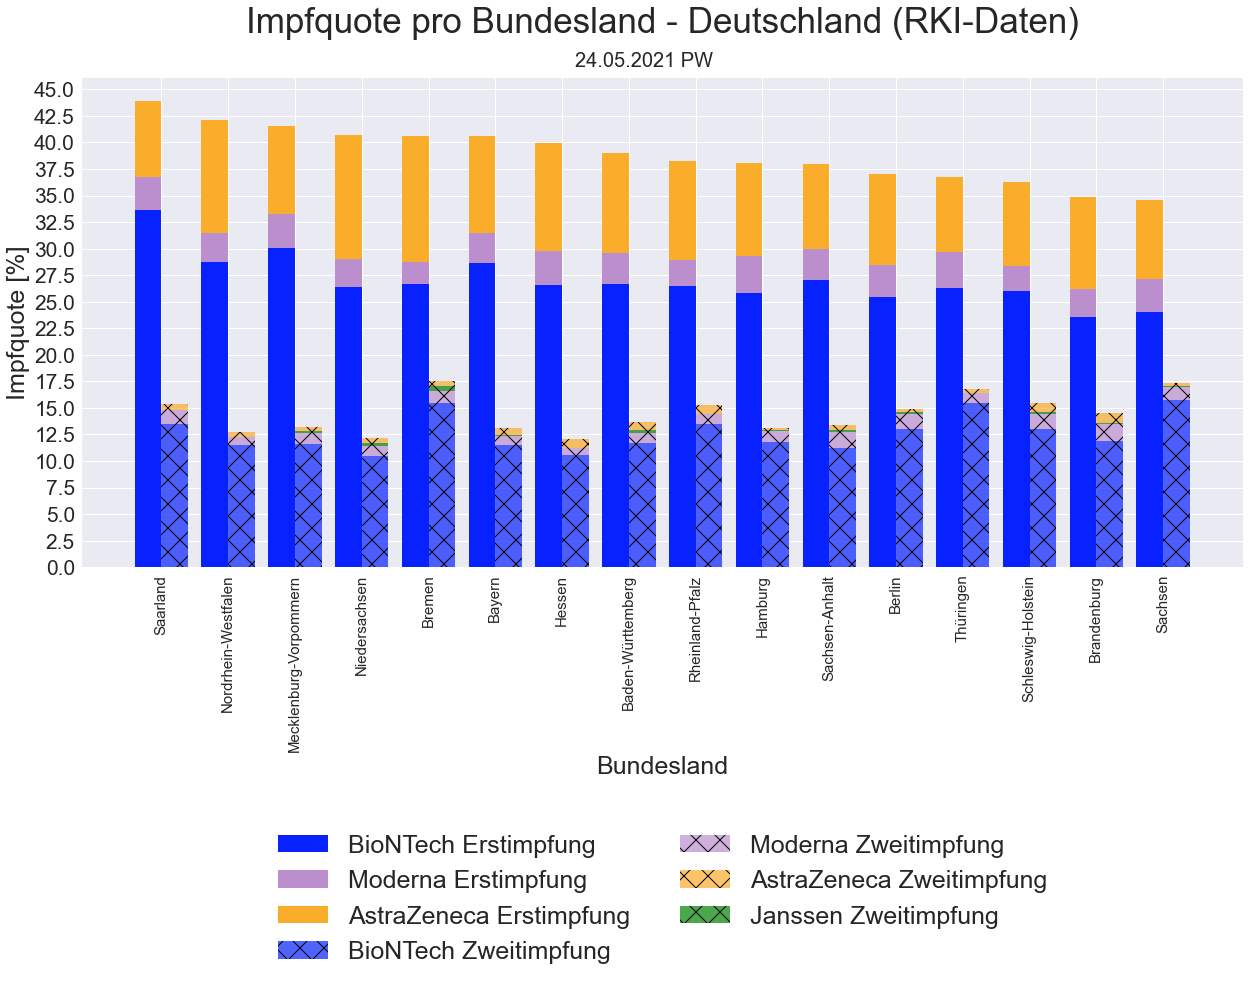

In [172]:
plt.figure(figsize=(h,v))

plt.style.use('seaborn')


w=0.40

x=df_I_EW["Bundesland"].tolist()
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]


p1 = plt.bar(x=bar1, height=df_I_EW["Impfquote_BioNTech_EI"], width = 0.4, 
             align = 'center', color = c_ger, label = "BioNTech Erstimpfung")

p2 = plt.bar(x=bar1, height=df_I_EW["Impfquote_Moderna_EI"], width = 0.4, 
             align = 'center', color = c_cz, 
             bottom=df_I_EW["Impfquote_BioNTech_EI"], label = "Moderna Erstimpfung")

p3 = plt.bar(x=bar1, height=df_I_EW["Impfquote_AstraZeneca_EI"], width = 0.4,
             align = 'center', color = c_gb, 
             bottom=  np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]), 
             label = "AstraZeneca Erstimpfung")



p4 = plt.bar(x=bar2, height=df_I_EW["Impfquote_BioNTech_ZI"], width = 0.4, 
             align = 'center', color = c_ger, label = "BioNTech Zweitimpfung", hatch="x", alpha = 0.7)

p5 = plt.bar(x=bar2, height=df_I_EW["Impfquote_Moderna_ZI"], width = 0.4, 
             align = 'center', color = c_cz, hatch="x", alpha = 0.7,
             bottom=df_I_EW["Impfquote_BioNTech_ZI"], label = "Moderna Zweitimpfung")

p6 = plt.bar(x=bar2, height=df_I_EW["Impfquote_AstraZeneca_ZI"], width = 0.4, ###
             align = 'center', color = c_gb, hatch="x", alpha = 0.7,
             bottom=  np.array(df_I_EW["Impfquote_BioNTech_ZI"]) + np.array(df_I_EW["Impfquote_Moderna_ZI"]) + np.array(df_I_EW["Impfquote_Janssen_ZI"]), 
             label = "AstraZeneca Zweitimpfung")

p7 = plt.bar(x=bar2, height=df_I_EW["Impfquote_Janssen_ZI"], width = 0.4, 
             align = 'center', color = "green", hatch="x", alpha = 0.7,
             bottom = np.array(df_I_EW["Impfquote_BioNTech_ZI"]) + np.array(df_I_EW["Impfquote_Moderna_ZI"]), 
             label = "Janssen Zweitimpfung")

# p6 = plt.bar(x=bar2, height=df_I_EW["Impfquote_AstraZeneca_ZI"], width = 0.4, ###
#              align = 'center', color = c_gb, alpha =0.7
#              bottom=  np.array(df_I_EW["Impfquote_BioNTech_ZI"]) + np.array(df_I_EW["Impfquote_Moderna_ZI"]), 
#              label = "AstraZeneca Zweitimpfung")






# p2 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_Moderna_EI"], width = 0.9, 
#              align = 'center', color = c_cz, 
#              bottom=df_I_EW["Impfquote_BioNTech_EI"], label = "Impfquote Moderna Erstimpfung")

# p3 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_AstraZeneca_EI"], width = 0.9, ###
#              align = 'center', color = c_gb, 
#              bottom=  np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]), label = "Impfquote AstraZeneca Erstimpfung")

# p4 = plt.bar(x=bar2, height=df_I_EW["Impfquote_ZI"], width = 0.4, 
#              align = 'center', color = c_at, 
#              label = "Impfquote Zweitimpfung")

# # Schriftgrößen x und y achsenwerte
plt.xticks(bar1+w/2, x,fontsize=size - 10, rotation=90)
plt.yticks(fontsize=size -4)

plt.yticks(np.arange(0, df_I_EW["Impfquote_EI"].max() +2.5 , 2.5))


plt.ylabel('Impfquote [%]', fontsize=size)
plt.xlabel('Bundesland', fontsize=size)

plt.title('Impfquote pro Bundesland - Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.5),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_7, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_7, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

In [173]:
# # def y_axis_thousands(x, pos):
# #    # 'The two args are the value and tick position'
# #     return '{:0,d}'.format(int(x)).replace(",",".")
# # formatter = FuncFormatter(y_axis_thousands)


# # fig = plt.figure(figsize=(h,v))
# # ax = fig.add_subplot()
# # ax.yaxis.set_major_formatter(formatter)

# plt.figure(figsize=(h,v))

# plt.style.use('seaborn')

# p1 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_BioNTech_EI"], width = 0.9, 
#              align = 'center', color = c_ger, label = "Impfquote BioNTech Erstimpfung")

# p2 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_Moderna_EI"], width = 0.9, 
#              align = 'center', color = c_cz, 
#              bottom=df_I_EW["Impfquote_BioNTech_EI"], label = "Impfquote Moderna Erstimpfung")

# p3 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_AstraZeneca_EI"], width = 0.9, ###
#              align = 'center', color = c_gb, 
#              bottom=  np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]), label = "Impfquote AstraZeneca Erstimpfung")

# p4 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_ZI"], width = 0.9, 
#              align = 'center', color = c_at, 
#              bottom=np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]) + np.array(df_I_EW["Impfquote_AstraZeneca_EI"]), 
#              label = "Impfquote Zweitimpfung")

# # # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation=90)
# plt.yticks(fontsize=size -4)

# plt.yticks(np.arange(0, df_I_EW["Impfquote_EI_ZI"].max() +0.5 , 0.5))


# plt.ylabel('Anteil verabreichte Dosen [%]', fontsize=size)
# plt.xlabel('Bundesland', fontsize=size)

# plt.title('Anteil verabreichte Dosen - Deutschland (RKI-Daten)\n', fontsize=size)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.5),
#            fancybox=True, 
#            shadow=True, 
#            ncol=2, 
#            fontsize=size)

# # plt.text(x, y, f'Anteil verabreichte Dosen Deutschland : {Impfquote_ger}%\n (Verabreichte Dosen)', 
# #         horizontalalignment='center', 
# #         size=size-4, 
# #         style='italic',
# #         bbox={'facecolor': c_ger, 'alpha': 0.5, 'pad': 5})


# # korrigierte Hochrechnung mit exp model machen 
# # plt.text(x, y, f'grobe Hochrechnung: 60% der Bevölkerung geimpft in \nca. {Herdenimmun} Jahren.\nImpfquote Deutschland: {Impfquote_ger}%', 
# #         horizontalalignment='center', 
# #         size=size-4, 
# #         style='italic',
# #         bbox={'facecolor': c_ger, 'alpha': 0.5, 'pad': 5})

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(Laufwerk + pfad_output + name_7, dpi = dpi, bbox_inches='tight')
# plt.savefig(Laufwerk + pfad_onedrive + name_7, dpi = dpi, bbox_inches='tight')

# plt.show()
# #plt.show()

### df_I_EW (Impfquote)

In [174]:
# #df_I_EW.head(1)

In [175]:
# # Timeseries gestern einlesen
# df_I_timeseries1 = pd.read_csv('D:\\Github\\Covid-19-Auswertung-WHO-DIVI\\output\\Dataframes\\df_I_timeseries.csv')

In [176]:
#df_I_EW.head(3)

### Berechnung Herdeinimmunität

In [177]:
df_I_EW

,Bundesland,Einwohner,BioNTech_EI,Impfquote_BioNTech_EI,Moderna_EI,Impfquote_Moderna_EI,AstraZeneca_EI,Impfquote_AstraZeneca_EI,BioNTech_ZI,Impfquote_BioNTech_ZI,...,AstraZeneca_ZI,Impfquote_AstraZeneca_ZI,Janssen_ZI,Impfquote_Janssen_ZI,Summe_EI,Impfquote_EI,Summe_ZI,Impfquote_ZI,Summe_EI_ZI,Impfquote_EI_ZI
11,Saarland,986887.0,331963,33.6374,30438,3.08424,70633,7.15715,133198,13.4968,...,5958,0.603717,34,0.00344518,433034,43.8788,152014,15.4034,585048,59.2822
9,Nordrhein-Westfalen,17947221.0,5164868,28.7781,481447,2.68257,1916669,10.6795,2067812,11.5216,...,69258,0.385898,8154,0.0454332,7562984,42.1401,2277489,12.6899,9840473,54.8301
7,Mecklenburg-Vorpommern,1608138.0,483508,30.0663,51371,3.19444,133127,8.27833,187176,11.6393,...,6103,0.379507,2543,0.158133,668006,41.5391,212118,13.1903,880124,54.7294
8,Niedersachsen,7993608.0,2107669,26.3669,208522,2.60861,940180,11.7616,834159,10.4353,...,34606,0.432921,25963,0.324797,3256371,40.7372,972579,12.167,4228950,52.9041
4,Bremen,681202.0,181806,26.689,13851,2.03332,80945,11.8827,105191,15.442,...,3636,0.533762,3195,0.469024,276602,40.605,119732,17.5766,396334,58.1816
1,Bayern,13124737.0,3753706,28.6002,372362,2.8371,1200431,9.14632,1506445,11.4779,...,83722,0.637895,10654,0.081175,5326499,40.5837,1719456,13.1009,7045955,53.6845
6,Hessen,6288080.0,1670910,26.5727,200623,3.19053,641472,10.2014,663125,10.5457,...,49265,0.783466,1185,0.0188452,2513005,39.9646,756965,12.0381,3269970,52.0027
0,Baden-Württemberg,11100394.0,2959930,26.6651,329545,2.96877,1042546,9.39197,1303278,11.7408,...,90305,0.81353,23632,0.212893,4332021,39.0258,1519490,13.6886,5851511,52.7144
10,Rheinland-Pfalz,4093903.0,1082929,26.4522,103116,2.51877,378901,9.25525,550796,13.4541,...,33350,0.814626,0,0,1564946,38.2263,624521,15.2549,2189467,53.4812
5,Hamburg,1847253.0,476409,25.7901,65445,3.54283,160861,8.70812,218386,11.8222,...,4760,0.25768,1311,0.0709702,702715,38.0411,242658,13.1362,945373,51.1772


In [178]:

# Impfstart = datetime.strptime('28.12.2020', '%d.%m.%Y')
# Tage_seit_Impfstart = (now-Impfstart).days
Summe_Impfungen = df_I_EW["Summe_EI_ZI"].sum()
# Impfgeschwindigkeit = (1/2)*Summe_Impfungen/Tage_seit_Impfstart
# Impfgeschwindigkeit_gestern = (1/2)*df_I_EW["Differenz zum Vortag"].sum()

# if Impfgeschwindigkeit_gestern > Impfgeschwindigkeit:
#     Impfgeschwindigkeit = (Impfgeschwindigkeit*0.2 + Impfgeschwindigkeit_gestern*0.8)
#     print(f'Impfgeschwindigkeit = {Impfgeschwindigkeit} IF-Statement')

# Herdenimmun = round((1/12)*(1/30)*(E_ger*0.6)*(1/(Impfgeschwindigkeit)),1)   # grobe Schätzung Zeit bis Herdenimmun



# print(f'Tage_seit_Impfstart = {Tage_seit_Impfstart}')   # wie lange schon geimpft wird
print(f'Summe_Impfungen = {Summe_Impfungen}')
# print(f'Impfgeschwindigkeit = {Impfgeschwindigkeit} Mittelwert')
# print(f'Impfgeschwindigkeit_gestern = {Impfgeschwindigkeit_gestern}')
# print(f'E_ger = {E_ger}')   # Einwohner Deutschland
# print(f'Herdenimmun = {Herdenimmun} Jahren')

Summe_Impfungen = 44269410


In [179]:
# v=s/t    v = 83020000*0.6 / t

Summe_Impfungen = df_I_EW["Summe_EI_ZI"].sum()
print(f'Summe_Impfungen  = {Summe_Impfungen} Impfungen\n')


Ende = datetime.strptime('01.10.2021', '%d.%m.%Y')
Tage_bis_Oktober = (Ende - now).days
print(f'Tage_bis_Oktober = {Tage_bis_Oktober} Tage\n')

Impfungen80 = 2*(E_ger*0.8) - Summe_Impfungen
SOLL_Impfungen80 = int(Impfungen80*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen80 = {SOLL_Impfungen80} Impfungen pro Tag')
print(f'Impfungen80 = {Impfungen80} Impfungen\n')

Impfungen60 = 2*(E_ger*0.6) - Summe_Impfungen
SOLL_Impfungen60 = int(Impfungen60*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen60 = {SOLL_Impfungen60} Impfungen pro Tag')
print(f'Impfungen60 = {Impfungen60} Impfungen\n')

Impfungen30 = 2*(E_ger*0.3) - Summe_Impfungen
SOLL_Impfungen30 = int(Impfungen30*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen30 = {SOLL_Impfungen30} Impfungen pro Tag')
print(f'Impfungen30 = {Impfungen30} Impfungen\n')

# Impfungen15 = 2*(E_ger*0.15) - Summe_Impfungen
# SOLL_Impfungen15 = int(Impfungen15*(1/Tage_bis_Oktober))
# print(f'SOLL_Impfungen15 = {SOLL_Impfungen15} Impfungen pro Tag')
# print(f'Impfungen15 = {Impfungen15} Impfungen\n')

# Impfungen5 = 2*(E_ger*0.05) - Summe_Impfungen
# SOLL_Impfungen5 = int(Impfungen5*(1/Tage_bis_Oktober))
# print(f'SOLL_Impfungen5 = {SOLL_Impfungen5} Impfungen pro Tag')
# print(f'Impfungen5 = {Impfungen5} Impfungen\n')


Summe_Impfungen  = 44269410 Impfungen

Tage_bis_Oktober = 129 Tage

SOLL_Impfungen80 = 686531 Impfungen pro Tag
Impfungen80 = 88562590.0 Impfungen

SOLL_Impfungen60 = 429105 Impfungen pro Tag
Impfungen60 = 55354590.0 Impfungen

SOLL_Impfungen30 = 42965 Impfungen pro Tag
Impfungen30 = 5542590.0 Impfungen



## Herdenimmunität Exponentialmodell

In [180]:
#df_I_EW

In [181]:
# # P = I*(1+v)^t 
# # t = ln(P/I) * ( 1 / ln(1+v) )
# # wobei P die ZIEL geimpften, I die heute geimpften, v der Wachstumsfaktor und t die Zeit ist

# Ziel_Geimpfte = E_ger*0.6
# print(f'Ziel_Geimpfte {Ziel_Geimpfte}')

# Geimpfte_Heute = df_I_EW["Summe_EI_ZI"].sum()
# print(f'Geimpfte_Heute= {Geimpfte_Heute}')

# Wachstumsfaktor = (1/10) * df_I_TS["Summe_EI_ZI"].iloc[-1] / df_I_TS["Summe_EI_ZI"].iloc[-10]
# print(f'Wachstumsfaktor = {Wachstumsfaktor}')

# ##########################################################

# Anzahl_Impfzentren = 400
# Impfungen_pro_Tag_MAX = 400 * 1000

# Tage_seit_Impfstart
# print(f'Tage_seit_Impfstart = {Tage_seit_Impfstart}')

# # logistic = MAX / (1+e^(-v*(x-x0))

# Zeit_Herdenimmun = np.log(Ziel_Geimpfte/Geimpfte_Heute) / (np.log(1+Wachstumsfaktor))
# print(f'Zeit_Herdenimmun = {Zeit_Herdenimmun}')

## df_I_TS Impfungen Timeseries

In [182]:
# df_I_TS

In [183]:
# Impfungen sheet_name der Datenquelle auslesen
df_I_sheet = pd.read_excel(Laufwerk + pfad_input + name_input, None)
sheet_name = df_I_sheet.keys()         # Tabellenblätter Namen auslesen
sheet_name = [*sheet_name][3]          # Namen des zweiten Tabellenblattes anzeigen [*dict] dict keyword->list Index 1 anzeigen
sheet_name

'Impfungen_proTag'

In [184]:
# df_I_TS

In [185]:


# Datenimport Impfungen
df_I_TS = pd.read_excel(Laufwerk + pfad_input + name_input,
                    sheet_name = sheet_name,
                    usecols="A:C")

df_I_TS = df_I_TS[:-6]   # drop last row
df_I_TS = df_I_TS.dropna(axis=0, how='any', thresh = 2)   # drop rows with more than 2 NaN values

df_I_TS['Erstimpfung'] = df_I_TS['Begonnene Impfserie']
df_I_TS['Zweitimpfung'] = df_I_TS['Vollständig geimpft']




df_I_TS['Zweitimpfung'] = df_I_TS['Zweitimpfung'].fillna(0)

df_I_TS['Summe_EI_ZI'] = df_I_TS['Erstimpfung'] + df_I_TS['Zweitimpfung']

# df_I_TS['MA'] = df_I_TS['Summe_EI_ZI'].ewm(alpha=0.5, adjust=False).mean()
df_I_TS['MA'] = df_I_TS['Summe_EI_ZI'].rolling(window=7,min_periods=1).mean()

df_I_TS['MSTD_Impfungen'] = df_I_TS['Summe_EI_ZI'].rolling(window=7,min_periods=1).std()

df_I_TS['OTG_Impfungen'] = df_I_TS['MA'] + df_I_TS['MSTD_Impfungen']
df_I_TS['UTG_Impfungen'] = df_I_TS['MA'] - df_I_TS['MSTD_Impfungen']

df_I_TS['SOLL_Impfungen80'] = SOLL_Impfungen80
df_I_TS['SOLL_Impfungen60'] = SOLL_Impfungen60
df_I_TS['SOLL_Impfungen30'] = SOLL_Impfungen30
# df_I_TS['SOLL_Impfungen15'] = SOLL_Impfungen15
# df_I_TS['SOLL_Impfungen5'] = SOLL_Impfungen5

df_I_TS['cumsum_EI'] = df_I_TS['Erstimpfung'].cumsum()
df_I_TS['cumsum_ZI'] = df_I_TS['Zweitimpfung'].cumsum()

df_I_TS = df_I_TS.loc[df_I_TS.Erstimpfung >0, :] # nur Erstimpfungen > 0 anzeigen
#df_I_TS

In [186]:
df_I_TS

,Datum,Begonnene Impfserie,Vollständig geimpft,Erstimpfung,Zweitimpfung,Summe_EI_ZI,MA,MSTD_Impfungen,OTG_Impfungen,UTG_Impfungen,SOLL_Impfungen80,SOLL_Impfungen60,SOLL_Impfungen30,cumsum_EI,cumsum_ZI
0,2020-12-27 00:00:00,24073.0,NaN,24073.0,0.0,24073.0,24073.000000,NaN,NaN,NaN,686531,429105,42965,24073.0,0.0
1,2020-12-28 00:00:00,18522.0,NaN,18522.0,0.0,18522.0,21297.500000,3925.149742,2.522265e+04,17372.350258,686531,429105,42965,42595.0,0.0
2,2020-12-29 00:00:00,50093.0,NaN,50093.0,0.0,50093.0,30896.000000,16855.177454,4.775118e+04,14040.822546,686531,429105,42965,92688.0,0.0
3,2020-12-30 00:00:00,62885.0,NaN,62885.0,0.0,62885.0,38893.250000,21100.285186,5.999354e+04,17792.964814,686531,429105,42965,155573.0,0.0
4,2020-12-31 00:00:00,50040.0,NaN,50040.0,0.0,50040.0,41122.600000,18941.133369,6.006373e+04,22181.466631,686531,429105,42965,205613.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021-05-15 00:00:00,230046.0,160561.0,230046.0,160561.0,390607.0,699410.714286,407184.972692,1.106596e+06,292225.741593,686531,429105,42965,30623630.0,9271126.0
140,2021-05-16 00:00:00,157980.0,118194.0,157980.0,118194.0,276174.0,698405.571429,408390.503783,1.106796e+06,290015.067645,686531,429105,42965,30781610.0,9389320.0
141,2021-05-17 00:00:00,344670.0,198879.0,344670.0,198879.0,543549.0,692949.428571,410458.809105,1.103408e+06,282490.619466,686531,429105,42965,31126280.0,9588199.0
142,2021-05-18 00:00:00,515434.0,350293.0,515434.0,350293.0,865727.0,662966.428571,384705.568955,1.047672e+06,278260.859616,686531,429105,42965,31641714.0,9938492.0


In [187]:
# # Impfungen sheet_name der Datenquelle auslesen
# df_I_sheet = pd.read_excel("D:\\Github\\Covid-19-Auswertung-WHO-DIVI\\input\\Impfquotenmonitoring.xlsx", None)
# sheet_name = df_I_sheet.keys()         # Tabellenblätter Namen auslesen
# sheet_name = [*sheet_name][2]          # Namen des zweiten Tabellenblattes anzeigen [*dict] dict keyword->list Index 1 anzeigen

# # Datenimport Impfungen
# df_I_TS = pd.read_excel("D:\\Github\\Covid-19-Auswertung-WHO-DIVI\\input\\Impfquotenmonitoring.xlsx",
#                     sheet_name = sheet_name,
#                     usecols="A:B")



#gleitender Mittelwert der cases und deaths, 7 Tage
# df_I_TS['MA'] = df_I_TS['Gesamtzahl Impfungen'].rolling(window=7,min_periods=1, center = False).mean()


# Date_reported in eine Datumsspalte umwandeln
#df_I_TS['Datum der Impfung'] = pd.to_datetime(df_I_TS.Date_reported, utc=True)
#df_I_TS = df_I_TS.dropna(axis=0, how='any')
#df_I_TS = df_I_TS[df_I_TS.Datum != 'Impfungen gesamt']

## RKI - Impfungen Timeseries

In [188]:
#df_I_TS.head(5)

## 7-2 Anzahl Impfungen - SOLL Impfungen - Timeseries

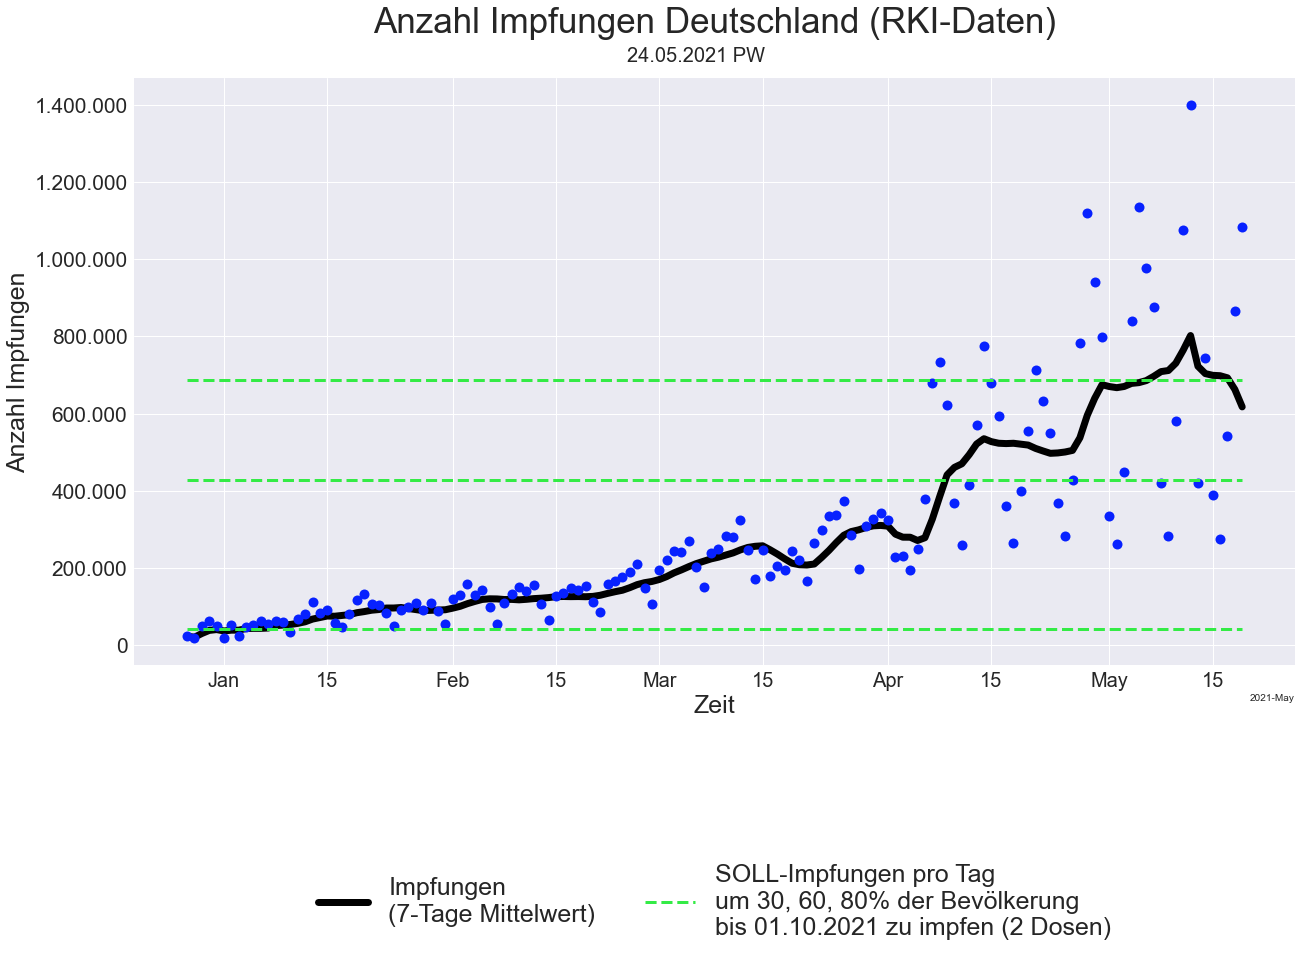

In [189]:

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig, ax = plt.subplots(figsize=(h, v*1.2))

ax.yaxis.set_major_formatter(formatter)


# ax0 = plt.plot(df_I_TS['Datum'],df_I_TS['cumsum_EI'], color=c_ger, marker='.', markersize = 20, linestyle = 'solid', linewidth = lwb, 
#              label = "Impfungen\n(7-Tage Mittel)") # blau, linie, dick

ax1 = plt.plot(df_I_TS['Datum'],df_I_TS['MA'], color="black", linestyle = 'solid', linewidth = lwb, 
               label = "Impfungen\n(7-Tage Mittelwert)") # blau, linie, dick

ax2 = plt.plot(df_I_TS['Datum'],df_I_TS['Summe_EI_ZI'], marker='.', linestyle='', color=c_ger, markersize = 20)

# ax3 = plt.plot(df_I_TS['Datum'],df_I_TS['OTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, label ="+- 1 sigma")
# ax4 = plt.plot(df_I_TS['Datum'],df_I_TS['UTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, label ="")

ax5 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen80'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "SOLL-Impfungen pro Tag\num 30, 60, 80% der Bevölkerung\nbis 01.10.2021 zu impfen (2 Dosen)")


ax6 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen60'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "")

ax7 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen30'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "")

# ax8 = plt.plot(df_I_TS['Datum'],
#                df_I_TS['SOLL_Impfungen15'], 
#                color='#34eb46', 
#                linestyle = 'dashed', 
#                linewidth = lws, 
#                label = "")

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 5, rotation=0)
plt.yticks(fontsize=size - 4)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Anzahl Impfungen Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # fill area between lines
# plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color='red',alpha=0.5)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.savefig(Laufwerk + pfad_output + name_7_2, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_7_2, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## 7-3 Timeseries 

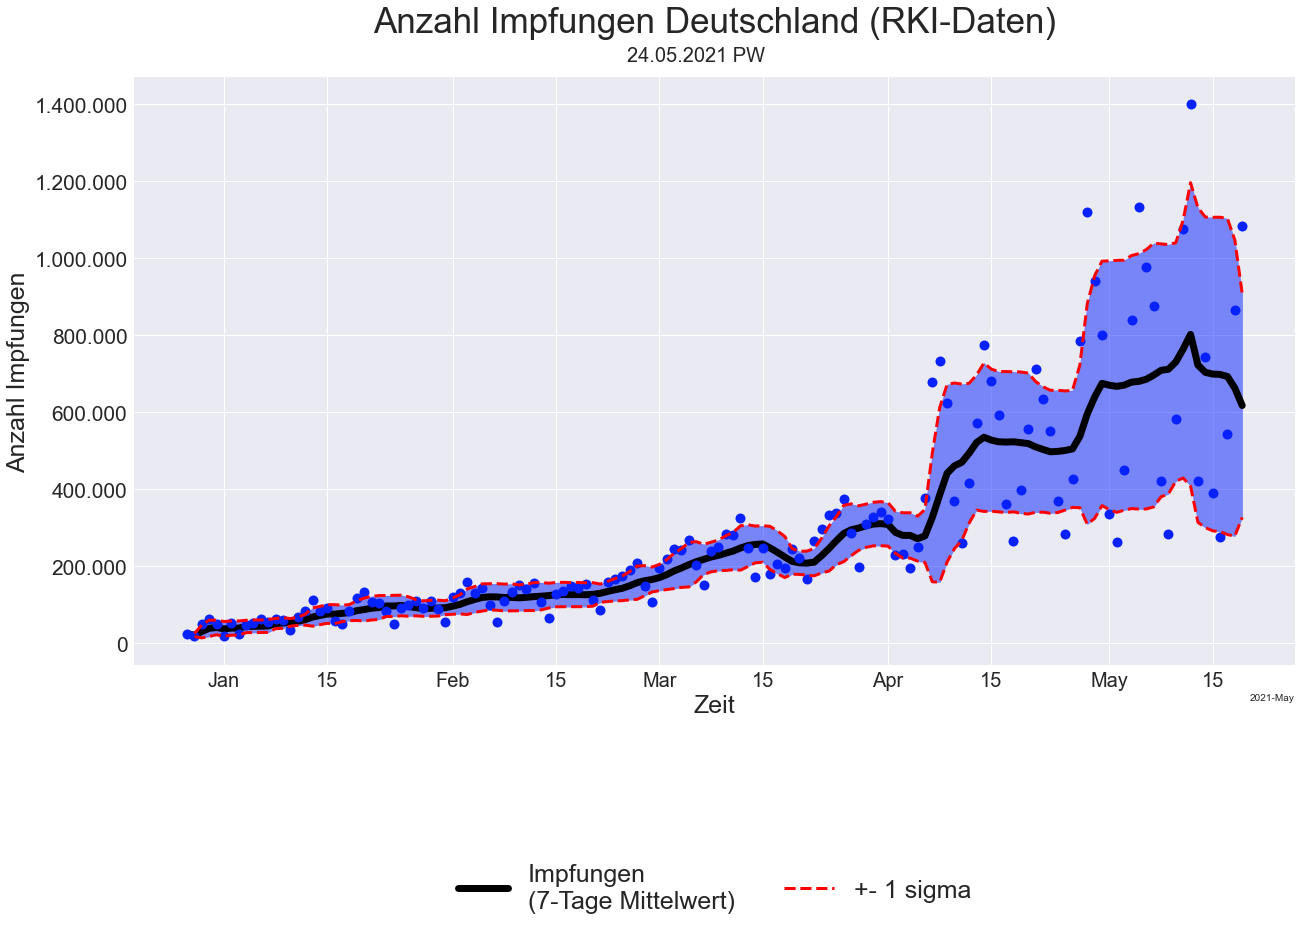

In [190]:

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)

fig, ax = plt.subplots(figsize=(h, v*1.2))

ax.yaxis.set_major_formatter(formatter)

ax1 = plt.plot(df_I_TS['Datum'],df_I_TS['MA'], color="black", linestyle = 'solid', linewidth = lwb, 
               label = "Impfungen\n(7-Tage Mittelwert)") # blau, linie, dick

ax2 = plt.plot(df_I_TS['Datum'],df_I_TS['Summe_EI_ZI'], marker='.', linestyle='', color=c_ger, markersize = 20)

ax3 = plt.plot(df_I_TS['Datum'],df_I_TS['OTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, 
               label ="+- 1 sigma")

ax4 = plt.plot(df_I_TS['Datum'],df_I_TS['UTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, 
               label ="")

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 5, rotation=0)
plt.yticks(fontsize=size - 4)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Anzahl Impfungen Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


# # fill area between lines
plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color=c_ger,alpha=0.5)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.savefig(Laufwerk + pfad_output + name_7_3, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_7_3, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## Anzahl Impfungen kumuliert

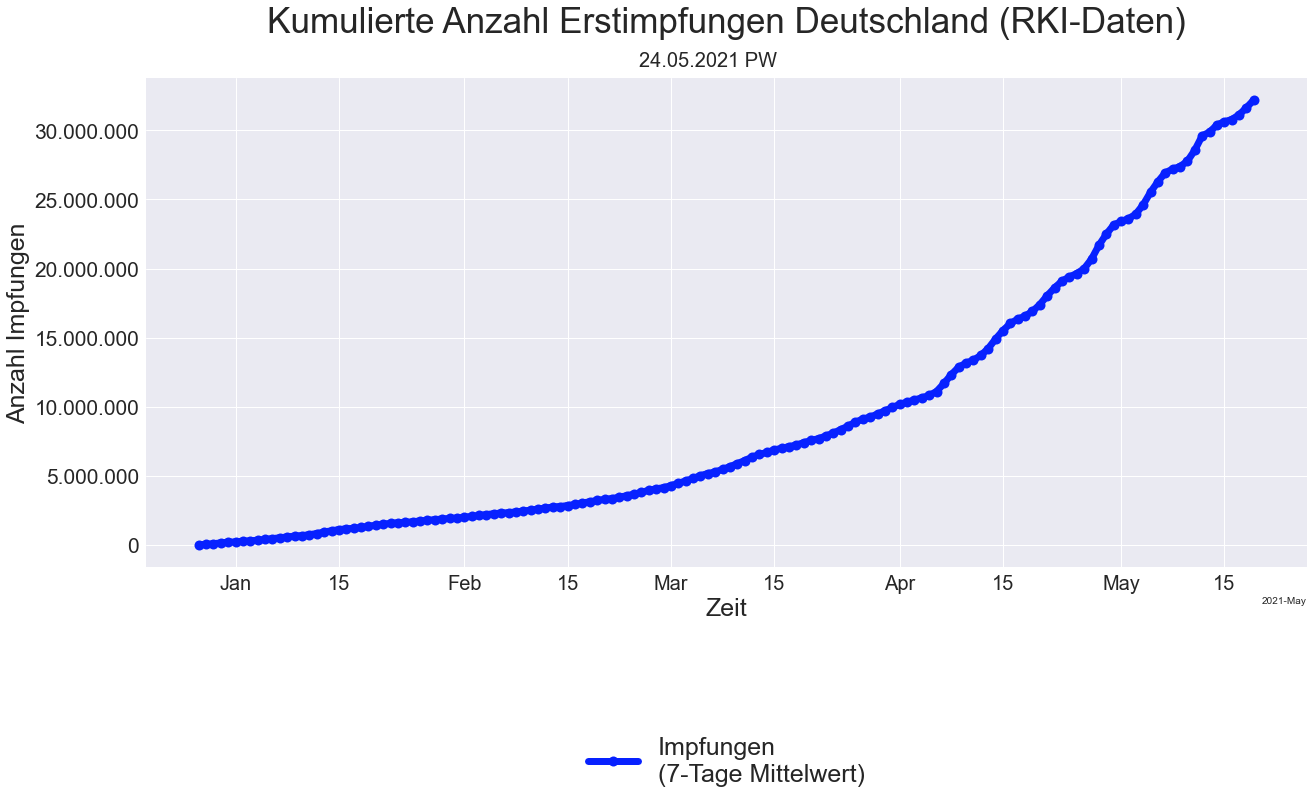

In [191]:
def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)


ax0 = plt.plot(df_I_TS['Datum'],df_I_TS['cumsum_EI'], color=c_ger, marker='.', markersize = 20, linestyle = 'solid', linewidth = lwb, 
               label = "Impfungen\n(7-Tage Mittelwert)") # blau, linie, dick

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 5, rotation=0)
plt.yticks(fontsize=size - 4)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Kumulierte Anzahl Erstimpfungen Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # fill area between lines
# plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color='red',alpha=0.5)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.savefig(Laufwerk + pfad_output + name_7_4, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_7_4, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## dataframes speichern

In [192]:
df_EW.to_csv(Laufwerk + pfad_output + name_output_df_EW, index=False)
df_I.to_csv(Laufwerk + pfad_output + name_output_df_I, index=False)
df_I_EW.to_csv(Laufwerk + pfad_output + name_output_df_I_EW, index=False)
df_I_TS.to_csv(Laufwerk + pfad_output + name_output_df_I_TS, index=False)
# df_VOC.to_csv(Laufwerk + pfad_output + name_output_df_VOC, index=False)




## Performance messen

In [193]:
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

# Laufzeit
x = now2 - now
x = round(x.total_seconds(),2)

# Performance CSV einlesen
d = pd.read_csv(Laufwerk + pfad_output + name_performance)

# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x],
      'Version': [Programm_Name]}

# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)

# Datenexport Performance
d.to_csv(Laufwerk + pfad_output + name_performance, index=False)

print(f'performance {pc} = {x} seconds')

performance DOUG = 6.18 seconds
